In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn import metrics
import seaborn as sns
from matplotlib.pyplot import plot
from sklearn.ensemble import GradientBoostingRegressor
from IPython.display import display

In [2]:
data_path = 'data.csv'
df = pd.read_csv(data_path)

In [3]:
dummy_fields = ["Layer-1","Layer-2"]

for each in dummy_fields:
    dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
    df = pd.concat([df,dummies], axis=1)

In [4]:
fields_to_drop = ["Layer-1","Layer-2"]
df = df.drop(fields_to_drop, axis=1)

In [5]:
tar = ['Core_Real', 'CoreImag', 'TotalPower', 'CorePower','EML', 'CLoss']
x = df[["Layer-1_Au",	"Layer-1_Au+Ta2O5",	"Layer-1_TiO2",	"Layer-2_Au",	"Layer-2_Ta2O5",	"Layer-2_TiO2","Ana-1","Ana-2","Thickness","WaveLength"]]
y = df[tar]

In [6]:
quant_features = tar
scaled_features = {}

for each in quant_features:
    mean, std = y[each].mean(), y[each].std()
    scaled_features[each] = [mean, std]
    y.loc[:, each] = (y[each] - mean)/std 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5352\3167035514.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[:, each] = (y[each] - mean)/std
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5352\3167035514.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[:, each] = (y[each] - mean)/std
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5352\3167035514.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=45)

In [8]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [9]:
np.linspace(0,2,11)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

Running:  0
[0]	validation_0-rmse:0.42338	validation_1-rmse:0.45770
[1]	validation_0-rmse:0.35080	validation_1-rmse:0.45258
[2]	validation_0-rmse:0.31515	validation_1-rmse:0.47876
[3]	validation_0-rmse:0.29496	validation_1-rmse:0.47696
[4]	validation_0-rmse:0.24934	validation_1-rmse:0.46593
[5]	validation_0-rmse:0.22473	validation_1-rmse:0.45049
[6]	validation_0-rmse:0.21370	validation_1-rmse:0.45987
[7]	validation_0-rmse:0.20536	validation_1-rmse:0.46298
[8]	validation_0-rmse:0.19830	validation_1-rmse:0.45409
[9]	validation_0-rmse:0.19353	validation_1-rmse:0.45362
[10]	validation_0-rmse:0.18873	validation_1-rmse:0.45295
[11]	validation_0-rmse:0.18186	validation_1-rmse:0.45006
[12]	validation_0-rmse:0.17751	validation_1-rmse:0.44859
[13]	validation_0-rmse:0.16928	validation_1-rmse:0.44884
[14]	validation_0-rmse:0.16117	validation_1-rmse:0.44808
[15]	validation_0-rmse:0.15882	validation_1-rmse:0.44783
[16]	validation_0-rmse:0.15632	validation_1-rmse:0.44753
[17]	validation_0-rmse:0.1532

[3]	validation_0-rmse:0.27274	validation_1-rmse:0.56750
[4]	validation_0-rmse:0.25863	validation_1-rmse:0.57872
[5]	validation_0-rmse:0.25037	validation_1-rmse:0.56658
[6]	validation_0-rmse:0.23906	validation_1-rmse:0.56771
[7]	validation_0-rmse:0.20619	validation_1-rmse:0.54690
[8]	validation_0-rmse:0.19968	validation_1-rmse:0.54635
[9]	validation_0-rmse:0.19093	validation_1-rmse:0.54087
[10]	validation_0-rmse:0.17511	validation_1-rmse:0.53993
[11]	validation_0-rmse:0.16881	validation_1-rmse:0.53756
[12]	validation_0-rmse:0.16057	validation_1-rmse:0.55244
[13]	validation_0-rmse:0.15453	validation_1-rmse:0.55305
[14]	validation_0-rmse:0.14980	validation_1-rmse:0.59377
[15]	validation_0-rmse:0.14661	validation_1-rmse:0.59431
[16]	validation_0-rmse:0.14511	validation_1-rmse:0.59464
[17]	validation_0-rmse:0.14238	validation_1-rmse:0.59492
[18]	validation_0-rmse:0.13372	validation_1-rmse:0.59226
[19]	validation_0-rmse:0.12982	validation_1-rmse:0.59265
Running:  8
[0]	validation_0-rmse:0.59

[6]	validation_0-rmse:0.26995	validation_1-rmse:0.72142
[7]	validation_0-rmse:0.25198	validation_1-rmse:0.71749
[8]	validation_0-rmse:0.23795	validation_1-rmse:0.70150
[9]	validation_0-rmse:0.22511	validation_1-rmse:0.69130
[10]	validation_0-rmse:0.21627	validation_1-rmse:0.68109
[11]	validation_0-rmse:0.19658	validation_1-rmse:0.67534
[12]	validation_0-rmse:0.18984	validation_1-rmse:0.67167
[13]	validation_0-rmse:0.17468	validation_1-rmse:0.68481
[14]	validation_0-rmse:0.16998	validation_1-rmse:0.68604
[15]	validation_0-rmse:0.16597	validation_1-rmse:0.68759
[16]	validation_0-rmse:0.16293	validation_1-rmse:0.68633
[17]	validation_0-rmse:0.16035	validation_1-rmse:0.68661
[18]	validation_0-rmse:0.15729	validation_1-rmse:0.68651
[19]	validation_0-rmse:0.15362	validation_1-rmse:0.67940
Running:  15
[0]	validation_0-rmse:0.89768	validation_1-rmse:1.00104
[1]	validation_0-rmse:0.74036	validation_1-rmse:0.94846
[2]	validation_0-rmse:0.57779	validation_1-rmse:0.84987
[3]	validation_0-rmse:0.4

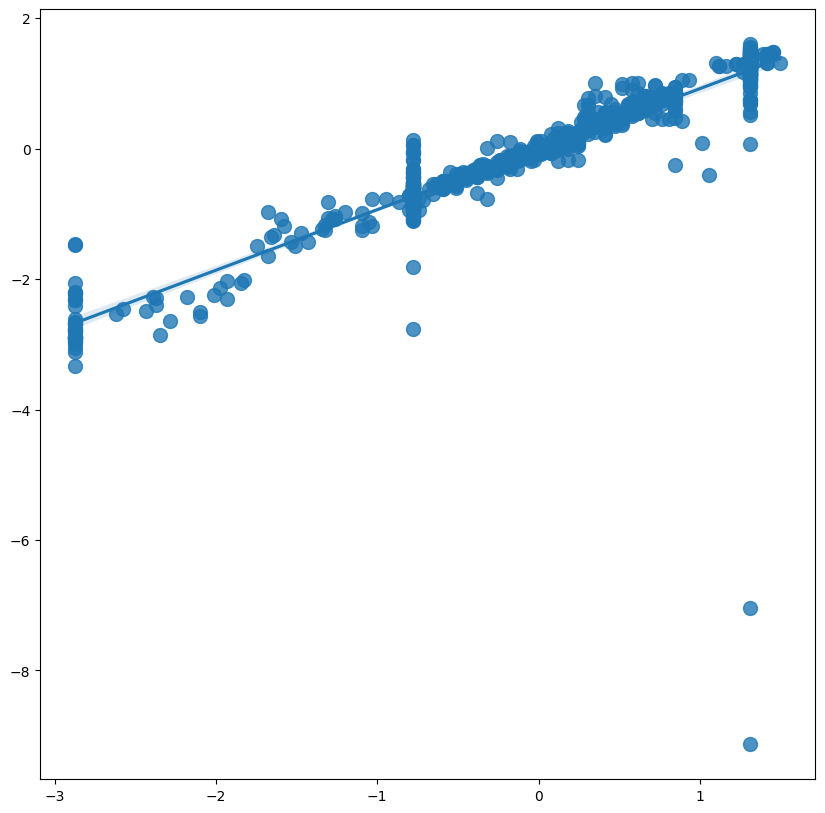

In [39]:
# learningRate =  np.linspace(0.8,1,11)
# estimator = 173
# mdepth = 14
# mchild = 2
# gm = 0
# subsam = 0.8
# colsam = 0.7
alp = np.linspace(1,2,20)
globCnt = 1000
v = 0
for j in alp:
  print("Running: ", v)
  v+=1
  
  xgb1 = XGBRegressor(
    learning_rate =j,
    n_estimators=20,
#     max_depth=j,
#     min_child_weight=j,
    subsample=1,
#     colsample_bytree=j,
#     reg_alpha=j,
#     nthread=4,
#     scale_pos_weight=1,
    seed=42)

  xgb1.fit(
    X_train, 
    y_train[:,4], 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train[:,4]), (X_test, y_test[:,4])], 
    verbose=True, 
    early_stopping_rounds = 20)



  expected_y, predicted_y = y_test[:,4], xgb1.predict(X_test)
  pre = predicted_y
  y = y_test[:,4]
#   print(predicted_y)
#   print(y)
  cnt=0
  for p in range(len(pre)):
    # print(y[i][0],'\t', pre[i], '\t', abs(y[i] - pre[i]))
    cnt = cnt + abs(y[p] - pre[p])
  if(cnt<globCnt):
    alp= j
    # print(i)
    print(alp," ------> " , cnt)  
    globCnt=cnt
    plt.figure(figsize=(10,10))
    sns.regplot(x=expected_y, y=predicted_y, fit_reg=True, scatter_kws={"s": 100})

Testing training data

Abs Error : 236.08397287752132


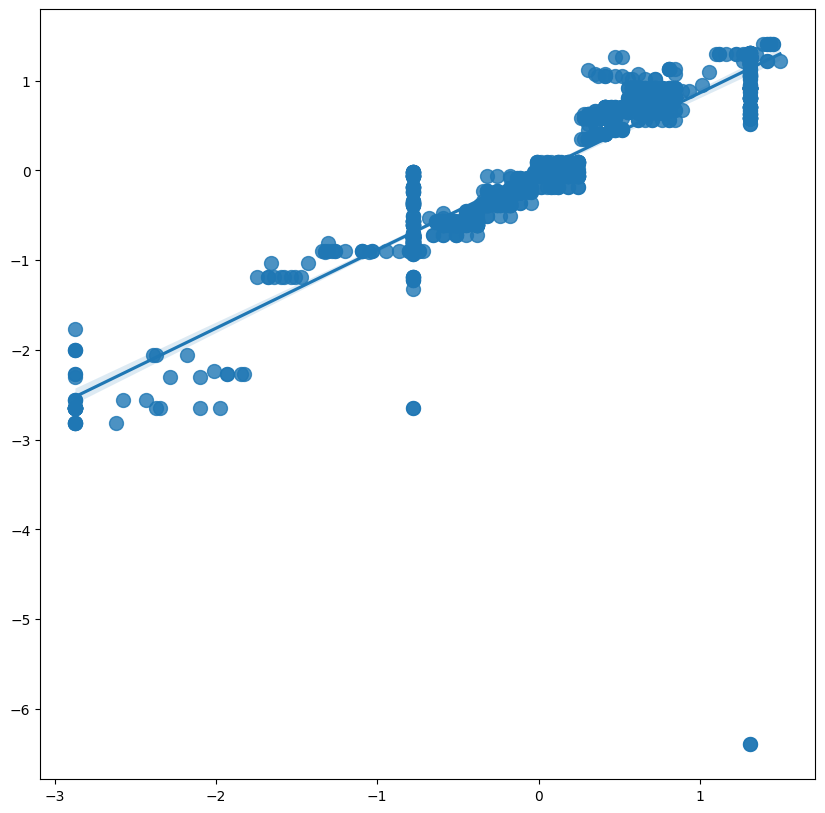

In [34]:
predicted_y = xgb1.predict(X_test)
expected_y = y_test[:,4]
plt.figure(figsize=(10,10))
sns.regplot(x=expected_y, y=predicted_y, fit_reg=True, scatter_kws={"s": 100})
expected_y, predicted_y = y_test[:,4], xgb1.predict(X_test)
pre = predicted_y
y = y_test[:,4]
#   print(predicted_y)
#   print(y)
cnt=0
for p in range(len(pre)):
# print(y[i][0],'\t', pre[i], '\t', abs(y[i] - pre[i]))
    cnt = cnt + abs(y[p] - pre[p])
print('Abs Error :', cnt)  

*XGBoost*

In [35]:
xgb1 = XGBRegressor(
    learning_rate =1,
    n_estimators=20,
#     max_depth=j,
#     min_child_weight=j,
    subsample=1,
#     nthread=4,
#     scale_pos_weight=1,
    seed=42)


In [36]:
xgb1.fit(
X_train, 
y_train[:,4], 
eval_metric="rmse", 
eval_set=[(X_train, y_train[:,4]), (X_test, y_test[:,4])], 
verbose=True, 
early_stopping_rounds = 20)


expected_y, predicted_y = y_test[:,4], xgb1.predict(X_test)
pre = predicted_y

[0]	validation_0-rmse:0.42338	validation_1-rmse:0.45770
[1]	validation_0-rmse:0.35080	validation_1-rmse:0.45258
[2]	validation_0-rmse:0.31515	validation_1-rmse:0.47876
[3]	validation_0-rmse:0.29496	validation_1-rmse:0.47696
[4]	validation_0-rmse:0.24934	validation_1-rmse:0.46593
[5]	validation_0-rmse:0.22473	validation_1-rmse:0.45049
[6]	validation_0-rmse:0.21370	validation_1-rmse:0.45987
[7]	validation_0-rmse:0.20536	validation_1-rmse:0.46298
[8]	validation_0-rmse:0.19830	validation_1-rmse:0.45409
[9]	validation_0-rmse:0.19353	validation_1-rmse:0.45362
[10]	validation_0-rmse:0.18873	validation_1-rmse:0.45295
[11]	validation_0-rmse:0.18186	validation_1-rmse:0.45006
[12]	validation_0-rmse:0.17751	validation_1-rmse:0.44859
[13]	validation_0-rmse:0.16928	validation_1-rmse:0.44884
[14]	validation_0-rmse:0.16117	validation_1-rmse:0.44808
[15]	validation_0-rmse:0.15882	validation_1-rmse:0.44783
[16]	validation_0-rmse:0.15632	validation_1-rmse:0.44753
[17]	validation_0-rmse:0.15326	validation

EML -0.23896234614626954
Abs Error : 755.8198799860587


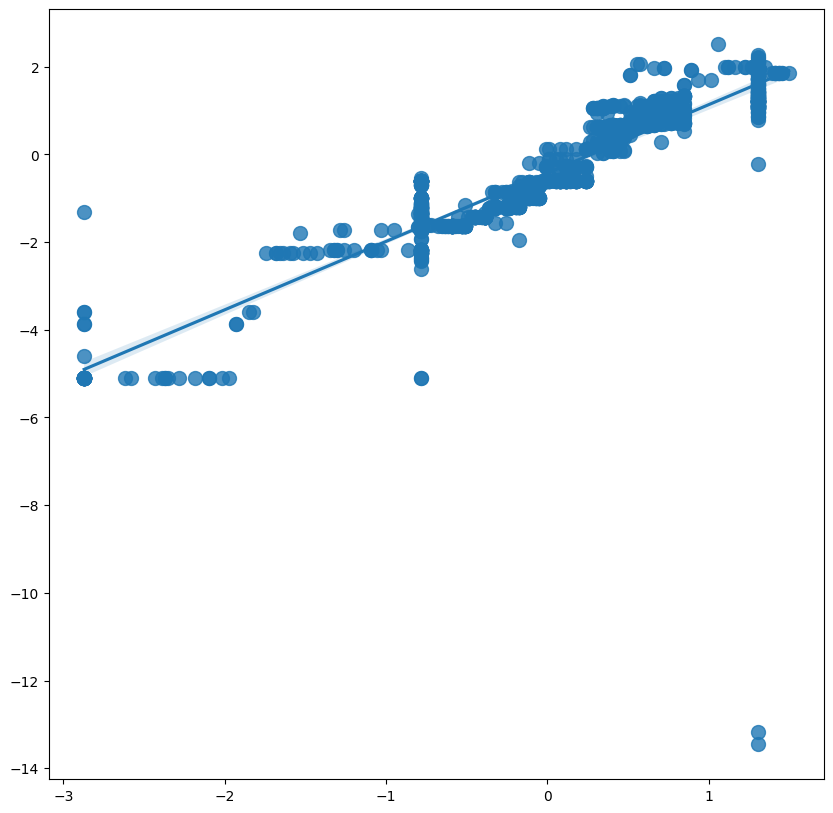

In [40]:
predicted_y = xgb1.predict(X_test)
expected_y = y_test[:,4]
plt.figure(figsize=(10,10))
k = 645
sns.regplot(x=expected_y, y=predicted_y, fit_reg=True, scatter_kws={"s": 100})
print(tar[4], metrics.r2_score(expected_y, predicted_y))
pre = predicted_y
y = y_test[:,4]
cnt=0
for i in range(len(pre)):
#   print(y[i],'\t', pre[i], '\t', abs(y[i] - pre[i]))
  cnt = cnt + abs(y[i] - pre[i])
print('Abs Error :', cnt)  

In [23]:
len(pre)

1108

In [ ]:
    learning_rate =learningRate,
    n_estimators=estimator,
    max_depth=mdepth,
    min_child_weight=mchild,
    gamma=gm,
    subsample=subsam,
    colsample_bytree=colsam,
    reg_alpha=j,
    nthread=4,
    scale_pos_weight=1,

In [57]:
op = 4
ko=-1
colsam = 0.7
alp = np.linspace(0.1,1,10)
globCnt = 1000
v = 0
for j in alp:
  print("Running: ", v)
  v+=1
  
  xgb1 = XGBRegressor(
    learning_rate =0.4,
    n_estimators=34,
    max_depth=15,  
    min_child_weight=1,
    gamma=j,
    seed=42)

  xgb1.fit(
    X_train, 
    y_train[:,op], 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train[:,op]), (X_test, y_test[:,op])], 
    verbose=True, 
    early_stopping_rounds = 20)



  expected_y, predicted_y = y_test, xgb1.predict(X_test)
  pre = predicted_y
  y = y_test[:,op]
  print(pre.shape)
  cnt=0
  for p in range(len(pre)):
    # print(y[i][0],'\t', pre[i], '\t', abs(y[i] - pre[i]))
    cnt = cnt + abs(y[p] - pre[p])
  print(j, cnt)  
  if(cnt<globCnt):
    ko= j
    # print(i)
    print(ko," ------> " , cnt)  
    globCnt=cnt
#     plt.figure(figsize=(10,10))
#     sns.regplot(expected_y, predicted_y)

Running:  0
[0]	validation_0-rmse:0.60897	validation_1-rmse:0.55963
[1]	validation_0-rmse:0.39096	validation_1-rmse:0.37716
[2]	validation_0-rmse:0.26175	validation_1-rmse:0.28263
[3]	validation_0-rmse:0.17767	validation_1-rmse:0.22382
[4]	validation_0-rmse:0.12593	validation_1-rmse:0.19588
[5]	validation_0-rmse:0.09777	validation_1-rmse:0.18737
[6]	validation_0-rmse:0.08141	validation_1-rmse:0.18405
[7]	validation_0-rmse:0.07564	validation_1-rmse:0.18149
[8]	validation_0-rmse:0.07196	validation_1-rmse:0.17701
[9]	validation_0-rmse:0.06970	validation_1-rmse:0.17651
[10]	validation_0-rmse:0.06964	validation_1-rmse:0.17637
[11]	validation_0-rmse:0.06962	validation_1-rmse:0.17629
[12]	validation_0-rmse:0.06961	validation_1-rmse:0.17624
[13]	validation_0-rmse:0.06960	validation_1-rmse:0.17621
[14]	validation_0-rmse:0.06960	validation_1-rmse:0.17620
[15]	validation_0-rmse:0.06960	validation_1-rmse:0.17619
[16]	validation_0-rmse:0.06960	validation_1-rmse:0.17618
[17]	validation_0-rmse:0.0696

[19]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[20]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[21]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[22]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[23]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[24]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[25]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[26]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[27]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[28]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[29]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[30]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[31]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[32]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[33]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
(428,)
0.5 37.05876827791212
Running:  5
[0]	validation_0-rmse:0.61017	validation_1-rmse:0.56088
[1]	validation_0-rmse:0.39444	validation_1-rmse:

[25]	validation_0-rmse:0.14523	validation_1-rmse:0.18740
[26]	validation_0-rmse:0.14523	validation_1-rmse:0.18740
(428,)
0.9 46.034922869299876
Running:  9
[0]	validation_0-rmse:0.61045	validation_1-rmse:0.56125
[1]	validation_0-rmse:0.39671	validation_1-rmse:0.38208
[2]	validation_0-rmse:0.27813	validation_1-rmse:0.28160
[3]	validation_0-rmse:0.20836	validation_1-rmse:0.22177
[4]	validation_0-rmse:0.17738	validation_1-rmse:0.19813
[5]	validation_0-rmse:0.16397	validation_1-rmse:0.18510
[6]	validation_0-rmse:0.16003	validation_1-rmse:0.18065
[7]	validation_0-rmse:0.15802	validation_1-rmse:0.17828
[8]	validation_0-rmse:0.15785	validation_1-rmse:0.17787
[9]	validation_0-rmse:0.15780	validation_1-rmse:0.17765
[10]	validation_0-rmse:0.15778	validation_1-rmse:0.17754
[11]	validation_0-rmse:0.15777	validation_1-rmse:0.17747
[12]	validation_0-rmse:0.15777	validation_1-rmse:0.17743
[13]	validation_0-rmse:0.15776	validation_1-rmse:0.17741
[14]	validation_0-rmse:0.15776	validation_1-rmse:0.17740

In [58]:
ko,globCnt

(0.1, 26.55045941668503)

In [ ]:
reg = GradientBoostingRegressor(
  learning_rate =0.13894736842105262,
  n_estimators=173,
  max_depth=14,
  subsample=0.8,
  loss='squared_error',
  alpha = 0.2,
  random_state = 42)
reg.fit(X_train, y_train)


In [ ]:
predicted_y = reg.predict(X_test)
expected_y = y_test
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

pre = predicted_y
y = y_test.to_numpy()
cnt=0
for i in range(len(pre)):
  print(y[i][0],'\t', pre[i], '\t', abs(y[i] - pre[i]))
  cnt = cnt + abs(y[i] - pre[i])
print('Abs Error :', cnt)  

In [ ]:
# learningRate =  1.0256410256410258
# estimator = 166
# mdepth = 20
# # mchild = np.linspace(1,100,100,dtype=int)
# # gm = 0
# spl = np.linspace(200,100, 100,dtype=int)
# # colsam = 0.7
# # alp = np.linspace(1e-06, 1e-04,15)
# globCnt = 1000
# v = 0
# for j in spl:
#   print("Running: ", v)
#   v+=1
  
#   reg = GradientBoostingRegressor(
#     learning_rate =learningRate,
#     n_estimators=estimator,
#     max_depth = mdepth,
#     criterion = 'friedman_mse',
#     min_samples_split = 0.1,
#     min_weight_fraction_leaf = 0,
#     min_impurity_decrease = 0,
#     alpha = 0.2,
#     max_leaf_nodes = 33,
#     validation_fraction = 0.6)

#   reg.fit(X_train, y_train)



#   expected_y, predicted_y = y_test, reg.predict(X_test)
#   pre = predicted_y
#   y = y_test.to_numpy()
#   cnt=0
#   for p in range(len(pre)):
#     # print(y[i][0],'\t', pre[i], '\t', abs(y[i] - pre[i]))
#     cnt = cnt + abs(y[p] - pre[p])
#   if(cnt<globCnt):
#     alp= j
#     # print(i)
#     print(alp," ------> " , cnt)  
#     globCnt=cnt
#     # plt.figure(figsize=(10,10))
#     # sns.regplot(expected_y, predicted_y)

In [ ]:
from sklearn.svm import SVR

In [ ]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train[tar[4]])